In [1]:
from QPCA.decomposition.Qpca import QPCA
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, transpile, execute,assemble
from qiskit.visualization import plot_bloch_multivector,plot_histogram,array_to_latex
import matplotlib.pyplot as plt
import random
from qiskit.extensions import UnitaryGate
from QPCA.preprocessingUtilities.preprocessing_matrix_utilities import generate_matrix
from QPCA.quantumUtilities.quantum_utilities import thetas_computation,from_binary_tree_to_qcircuit,state_vector_tomography

# General use case of tomography 

Here we show that our tomography implementation can be used in general to estimate any quantum circuit' statevectors.

In [2]:
qc=QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)

qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

In [4]:
aer=Aer.get_backend('statevector_simulator')
statevector=aer.run(transpile(qc,aer)).result().get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

In [6]:
state_vector_tomography(qc,n_shots=8000,qubits_to_be_measured=[0])

{'0': 0.7075485849042453, '1': -0.7066647012551285}

We can specify the qubits that you want to reconstruct (or measure) and if drawing the circuit that implements the tomography

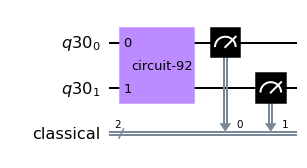

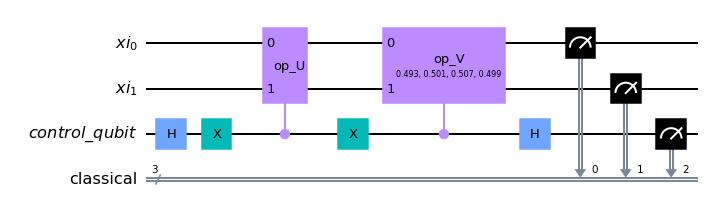

{'00': 0.4930770730829005,
 '01': -0.501373114556415,
 '10': 0.50658168146904,
 '11': -0.4988737315193094}

In [7]:
state_vector_tomography(qc,n_shots=8000,drawing_amplitude_circuit=True,drawing_sign_circuit=True)

# Qpca class usability

In [2]:
resolution=8
matrix_dimension=4
lista=list(range(0,2**resolution))
eigenvalues_list=[0.65,0.25,0.06,0.04]


In [3]:
#4747
seed=4747
input_matrix=generate_matrix(matrix_dimension=matrix_dimension,replicate_paper=False,seed=seed)#,eigenvalues_list=eigenvalues_list)

Matrix:
 [[0.63 0.55 0.5  0.89]
 [0.55 1.41 1.1  1.3 ]
 [0.5  1.1  1.08 1.47]
 [0.89 1.3  1.47 2.36]]

eigenvalue: 0.01593042549125613 - eigenvector: [ 0.23  -0.357  0.812 -0.4  ]
eigenvalue: 0.2943707848528235 - eigenvector: [ 0.882  0.207 -0.303 -0.295]
eigenvalue: 0.5238941243476808 - eigenvector: [-0.304  0.772  0.163 -0.534]
eigenvalue: 4.647071393343875 - eigenvector: [-0.277 -0.483 -0.471 -0.685]


In [4]:
qpca=QPCA().fit(input_matrix,resolution=resolution)

In [5]:
np.linalg.eig(qpca.input_matrix),qpca.input_matrix

((array([0.84780975, 0.09557902, 0.05370488, 0.00290634]),
  array([[-0.27669967, -0.30381059,  0.88229208,  0.2295585 ],
         [-0.48274483,  0.77216236,  0.20746302, -0.35732594],
         [-0.47083591,  0.16297368, -0.30291613,  0.81240073],
         [-0.68462272, -0.53376399, -0.29455322, -0.39953239]])),
 array([[0.11569178, 0.10041638, 0.09190918, 0.16188064],
        [0.10041638, 0.25724589, 0.20051089, 0.23793944],
        [0.09190918, 0.20051089, 0.19733259, 0.26882131],
        [0.16188064, 0.23793944, 0.26882131, 0.42972974]]))

/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/miniconda3/envs/EAGLE_environment/lib/python3.8/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(array([0.84765625, 0.00390625, 0.0546875 , 0.09375   ]),
 array([[ 0.27568255,  0.24489042,  0.86953791,  0.2566989 ],
        [ 0.48295042, -0.37695652,  0.22276922,  0.69770648],
        [ 0.47194424,  0.83288539, -0.30292163,  0.12834945],
        [ 0.68453781, -0.3949306 , -0.29903288,  0.46983613]]))

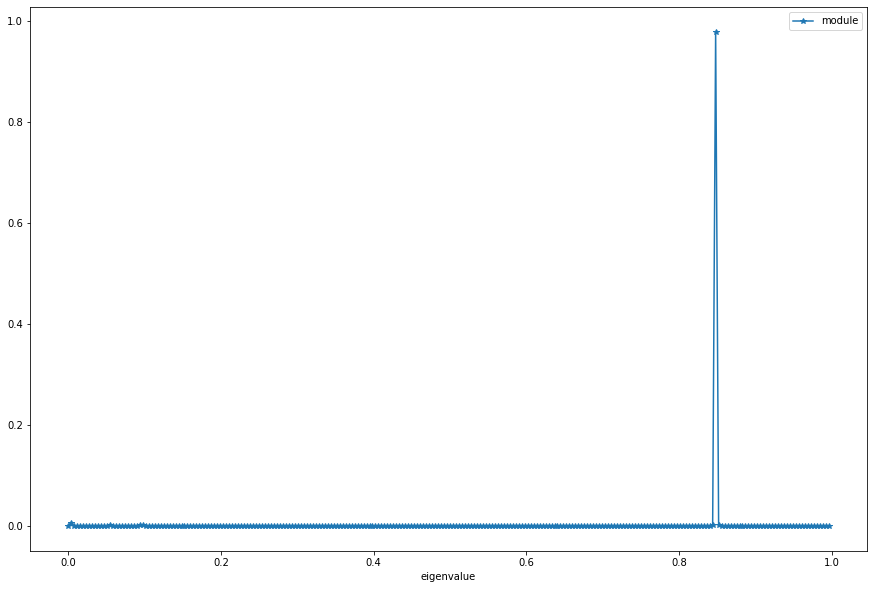

In [6]:
qpca.eigenvectors_reconstruction(n_shots=1000000,n_repetitions=1,plot_peaks=True)

In [7]:
qpca.quantum_input_matrix_reconstruction()

array([[0.61490755, 0.7667261 , 0.54684726, 0.8587761 ],
       [0.7667261 , 1.35175844, 1.07806179, 1.68770278],
       [0.54684726, 1.07806179, 1.08568547, 1.55212629],
       [0.8587761 , 1.68770278, 1.55212629, 2.3207647 ]])

In [9]:
qpca.true_input_matrix,np.linalg.eig(qpca.input_matrix)

(array([[0.63413752, 0.55040898, 0.50377871, 0.88731099],
        [0.55040898, 1.41003332, 1.09905367, 1.30420951],
        [0.50377871, 1.09905367, 1.08163257, 1.47348129],
        [0.88731099, 1.30420951, 1.47348129, 2.35546331]]),
 (array([0.84780975, 0.09557902, 0.05370488, 0.00290634]),
  array([[-0.27669967, -0.30381059,  0.88229208,  0.2295585 ],
         [-0.48274483,  0.77216236,  0.20746302, -0.35732594],
         [-0.47083591,  0.16297368, -0.30291613,  0.81240073],
         [-0.68462272, -0.53376399, -0.29455322, -0.39953239]])))